In [1]:
import requests

year = 2023
day = 10

url = f"https://adventofcode.com/{year}/day/{day}/input"

with open("cookie.txt", "r") as file:
    session = file.read()

headers = {"cookie": f"session={session}"}

with open(f"inputs/day_{str(day).zfill(2)}_input.txt", "wb") as file:
    file.write(requests.get(url, headers=headers).content)

lines = [x.strip() for x in open(f"inputs/day_{str(day).zfill(2)}_input.txt", "r")]
print(lines[:5])

['L.F--FF|.-.FF-777.F7FL-F.7.F-77.F--FF--.JJ7..F-77|FFF|7-F-J7--F7|7-F7FJ7-F7FF--7--7F-|7F--.|FF|7FF-F77-F7FJ777.FJ.FJ7-|-7-FFFJFF-77L7LF|FL77', '.L.|F---F.FFJ.LF--7-7JFL7|-77|-L-|.7|.J-|LJ7.|L-7|--7||7L|||||JFJ|.LF7||.|F7FF-77-J--L-7JJ-J--77F7L||-7LLJ7|JFJ.F-|L7-|7L--7--J-L77.L.|F77L|', '--LL7J7||-FJF7-||L|..-.F7J.|-J.|.F-LJ.|.-J.|FF-|-JFL|J77.|7FFF7|.L7.F.--F|.LJL-|J.LL7JLLJ7..LJ.LJJFJL7L7.LL-7L---FL7|7L-F.LLJJ|JFL|-J7L||7..', 'J7F|7FFJ..LLL7JL|LJ--7|7|FF|J||7FJJ.LJ-.L.F|LL---FL--7.--L-JF|L-7J|..L.|JL|7|--J.F|JF..|L-F7F|FF7LL7FJ7||F|FJ.FL-----7LJLFL|7--FJF|L||F|L-7L', 'LLF.J-L|J--7FLF--77FLLF-FJ|L-F--7|.7||L|L---..LJFJ.LJ-7L|.LL|L|.--7-JJFF-FJFJ-JFL7J-|7.F-FJJ7J-|-7FJL-77J|7777LLF|77L-|LF-7L|J.|J--J|||J|-7.']


In [164]:
# | is a vertical pipe connecting north and south.
# - is a horizontal pipe connecting east and west.
# L is a 90-degree bend connecting north and east.
# J is a 90-degree bend connecting north and west.
# 7 is a 90-degree bend connecting south and west.
# F is a 90-degree bend connecting south and east.
# . is ground; there is no pipe in this tile.
# S is the starting position of the animal; there is a pipe on this tile, but your sketch doesn't show what shape the pipe has.

test = """FF7FSF7F7F7F7F7F---7
L|LJ||||||||||||F--J
FL-7LJLJ||||||LJL-77
F--JF--7||LJLJ7F7FJ-
L---JF-JLJ.||-FJLJJ7
|F|F-JF---7F7-L7L|7|
|FFJF7L7F-JF7|JL---7
7-L-JL7||F7|L7F-7F7|
L.L7LFJ|||||FJL7||LJ
L7JLJL-JLJLJL--JLJ.L""".split("\n")

source = lines

# test = """
# |-LJ7F.-S-
# """

#source = test

R = len(source)
C = len(source[0])

map_ = {}

blanks = []

for r, row in enumerate(source):
    for c, column in enumerate(row):
        if column == "|":
            map_[(r,c)] = [(r-1,c), (r+1,c)]
        if column == "-":
            map_[(r,c)] = [(r,c-1), (r,c+1)]
        if column == "L":
            map_[(r,c)] = [(r-1,c), (r,c+1)]
        if column == "J":
            map_[(r,c)] = [(r-1,c), (r,c-1)]
        if column == "7":
            map_[(r,c)] = [(r+1,c), (r,c-1)]        
        if column == "F":
            map_[(r,c)] = [(r+1,c), (r,c+1)]
        if column == "S":
            start = (r,c)
        if column == '.':
            blanks.append((r,c))
            
            
#print(map_)
#print(start)

# directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
# 
# for direction in directions:
#     print(start[0] + direction[0], start[1] + direction[1])
#     print(lines[start[0] +direction[0]][start[1] + direction[1]])
# 
# print()

first_steps = []

for key, node in map_.items():
    if start in node:
        first_steps.append(key)
        
map_[start] = first_steps

print(start)

from pprint import pprint
#pprint(map_)

previous_node = map_[start][0]
current_node = start
i = 0
path = []
while True:
    i +=1
    #print(current_node, map_[current_node])
    path.append(current_node)
    next_node = [x for x in map_[current_node] if x != previous_node][0]
    previous_node = current_node
    current_node = next_node
    if next_node == start:
        print(i)
        break
print((i+1)//2)

(62, 61)
13630
6815


(62, 61) [(62, 60), (63, 61)]
found start 7


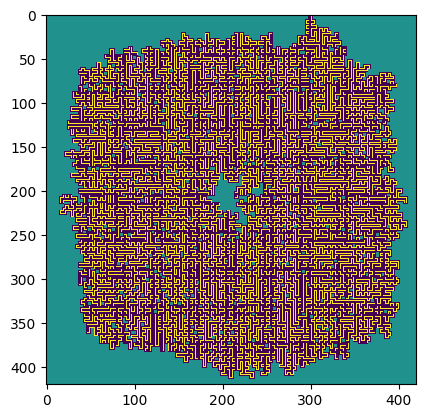

In [165]:
print(start,first_steps)

#(4, 12) [(4, 13), (5, 12)]

start_piece = ''

# | is a vertical pipe connecting north and south.   
# - is a horizontal pipe connecting east and west.
# L is a 90-degree bend connecting north and east.
# J is a 90-degree bend connecting north and west.
# 7 is a 90-degree bend connecting south and west.
if (start[0],start[1]-1) in first_steps and (start[0]+1,start[1]) in first_steps:
    start_piece = '7'
# F is a 90-degree bend connecting south and east.
if (start[0],start[1]+1) in first_steps and (start[0]+1,start[1]) in first_steps:
    start_piece = 'F'

BLANK = 64
EMPTY = 0
# start must be an 7

#upscale to 9x9 per pipe?
import numpy as np
import matplotlib.pyplot as plt

upscaled = np.zeros((R*3,C*3))

for r, row in enumerate(source):
    for c, column in enumerate(row):
        
        #if column == '.':
        if (r,c) not in path:
            upscaled[3*r][3*c] = BLANK
            upscaled[3*r][3*c+1] = BLANK
            upscaled[3*r][3*c+2] = BLANK
            upscaled[3*r+1][3*c] = BLANK
            upscaled[3*r+1][3*c+1] = BLANK
            upscaled[3*r+1][3*c+2] = BLANK
            upscaled[3*r+2][3*c] = BLANK
            upscaled[3*r+2][3*c+1] = BLANK
            upscaled[3*r+2][3*c+2] = BLANK
        else:
                
            
            
            # if (r,c) not in path:
            #     continue
            
            
            if column == 'S':
                column = start_piece
                if start_piece == '':
                    assert False
                print("found start", start_piece)
            
            if column == "|":
                upscaled[3*r][3*c+1] = 127
                upscaled[3*r+1][3*c+1] = 127
                upscaled[3*r+2][3*c+1] = 127
            if column == "-":
                upscaled[3*r+1][3*c] = 127
                upscaled[3*r+1][3*c+1] = 127
                upscaled[3*r+1][3*c+2] = 127
            if column == "L":
                upscaled[3*r][3*c+1] = 127
                upscaled[3*r+1][3*c+1] = 127
                upscaled[3*r+1][3*c+2] = 127
            if column == "J":
                upscaled[3*r][3*c+1] = 127
                upscaled[3*r+1][3*c+1] = 127
                upscaled[3*r+1][3*c] = 127
            if column == "7":
                upscaled[3*r+1][3*c] = 127
                upscaled[3*r+1][3*c+1] = 127
                upscaled[3*r+2][3*c+1] = 127
            if column == "F":
                upscaled[3*r+1][3*c+2] = 127
                upscaled[3*r+1][3*c+1] = 127
                upscaled[3*r+2][3*c+1] = 127

        
            
            
plt.imshow(upscaled, interpolation='none')
plt.show()
from PIL import Image
height, width = upscaled.shape

# Create an image from the array
im = Image.fromarray(upscaled.astype('uint8'))

# Resize the image to match the array dimensions
im = im.resize((width, height))

# Save the image
im.save("your_file.bmp")

In [166]:
# for each . in the image.
# either you can flood fill to the edge, or you can't.

def floodFill(x,y, new):
    #global filled
    toFill = set()
    toFill.add((x,y))
    while not len(toFill) == 0:
        #print(toFill)
        (x,y) = toFill.pop()
        if x < 0 or x >= len(field[0]) or y < 0 or y >= len(field):
            #continue
            # Got to edge
            return False
        if field[y][x] == BLANK or field[y][x] == EMPTY or field[y][x] == 254:
            field[y][x] = new
            #filled.add((x,y))
            toFill.add((x-1,y))
            toFill.add((x+1,y))
            toFill.add((x,y-1))
            toFill.add((x,y+1))
        else:
            continue


fails = 0
oks = 0
for r, row in enumerate(source):
    for c, column in enumerate(row):
        
        #if column == '.':
        if (r,c) not in path:
            #filled = set()
            field = upscaled.copy()
            
            got_to_edge = floodFill(c*3+1,r*3+1, 196)
            if got_to_edge is False:
                fails +=1
            else:
                oks += 1
                #print(blank)
            # plt.imshow(field, interpolation='none')
            # plt.show()
print(fails, oks)




5701 269
